## THE SPARK FOUNDATION : DATA SCIENCE AND BUSINESS ANALYTICS INTERN

### TASK 2 : Prediction using unsupervised machine learning algorithm(K means clustering)
### Author : Simran Dsouza

To predict the optimum number of clusters and represent it virtually using unsupervised machine learning algorithm

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#reading dataset
data = pd.read_csv("Iris.csv")

In [6]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Extracting Features from the dataset

In [21]:
x = data.iloc[:,[1,2,3,4]].values

In [29]:
#displaying the extracted features
df = pd.DataFrame(x)
df.columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum number of clusters

#### Elbow Method
In this method the number of cluster varies within a certain range. For each number within a cluster is equal to the sum of square value is calculated and stored in a list.These values are then plotted against the range of number of clusters used before.The location of bend in 2d plot represents the appropriate number of clusters.

In [32]:
#calculating within cluster sum of square value
within_cluster_sum_of_sqr = []

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    within_cluster_sum_of_sqr.append(km.inertia_)

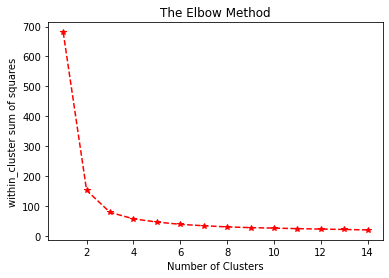

In [42]:
#plotting the graph
plt.plot(cluster_range,within_cluster_sum_of_sqr,'*--',color = "red")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("within_cluster sum of squares")
plt.show()

from the above graph we can clearly see that the optimum clusters is where the elbow occurs hence it is called as elboe method.This is when the cluster sum of squares does not decrease significantly with every iteration.

from this we can choose the number of clusters as 3

### Applying KMeans Clustering 

In [45]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10,random_state=0)
pred = model.fit_predict(df)

## Visualizing the Cluster

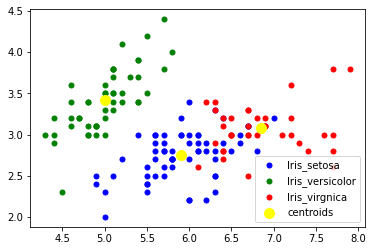

In [46]:
x = df.iloc[:,[0,1,2,3]].values
plt.scatter(x[pred==0,0],x[pred == 0,1],s=25,c='blue',label="Iris_setosa")
plt.scatter(x[pred==1,0],x[pred == 1,1],s=25,c='green',label="Iris_versicolor")
plt.scatter(x[pred==2,0],x[pred == 2,1],s=25,c='red',label="Iris_virgnica")

#plotting the cluster centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c="yellow",label="centroids")
plt.legend()
plt.show()